In [59]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange, CubicSpline, CubicHermiteSpline, BarycentricInterpolator
import sympy as sp
sp.init_printing()
import math as mt
import pandas as pd
import urllib.request

# Actividad 04: Interpolación

---
### Profesor: Juan Marcos Marín
### Nombre: David Alejandro Perez
*Métodos computacionales 2024-II*

---

# 1a
Supongamos que queremos interpolar la función  $f(x)=\sin(x)$  usando los puntos  $x_0=0$ ,  $x_1=\pi/2$ , y  $x_2=\pi$.

Encuentre el polinomio de interpolación de Lagrange y el error asociado al misma. Recuerde que el error de interpolación de Lagrange puede expresarse explícitamente como:

\begin{equation}
f(x) - P(x) = \epsilon = \frac{1}{(n+1)!} f^{(n+1)}(x)(x - x_0)(x - x_1) ... (x - x_n)
\end{equation},
Donde:
- $f^{(n+1)}(x)$ es la derivada de orden $n$ de la función $f(x)$ evaluada en algún punto $x$ en el intervalo de interpolación.



In [2]:
#veamos que el polinomio de lagrange estara dado por y*l_i(x)

x = np.array([0,np.pi/2,np.pi])
y = np.sin(x)



pol = lagrange(x,y)
print(pol)



# Ahora vamos a encontrar el error asociado a este polinomio
x_1 = sp.symbols('x')
f_x = sp.sin(x_1)



def error_lagrange(x, f_x, xsim = sp.symbols('x')):
  x_inter = np.linspace(x[0],x[-1],100)

  f_prima = sp.diff(f_x, xsim, len(x))
  f_prima = sp.lambdify(x_1, f_prima)
  error = []
  fact = mt.factorial(len(x)+1)
  for i in range(len(x_inter)):
    prod = 1
    for j in range(len(x)):
      prod = prod*(x_inter[i] - x[j])
    erre = abs((1/fact)*f_prima(x_inter[i])*prod)
    error.append(erre)
  print(error)
  return x_inter, error

x_1, y_1 = error_lagrange(x,f_x)

abs(np.sin(x_1)-pol(x_1))


         2
-0.4053 x + 1.273 x
[0.0, 0.006325311282319016, 0.012244833254726037, 0.017750363388186783, 0.022835981092651995, 0.027497986138080376, 0.031734831821452356, 0.035547053152097045, 0.038937190336325464, 0.041909707850340046, 0.044470909397662454, 0.046628849053879165, 0.04839323890733653, 0.04977535350951956, 0.05078793145321258, 0.05144507440016243, 0.05176214388284299, 0.05175565620705052, 0.05144317578344375, 0.05084320721678146, 0.049975086481505795, 0.048858871511476526, 0.04751523253008475, 0.04596534244467074, 0.04423076762614897, 0.04233335939101262, 0.040295146498459805, 0.03813822897026993, 0.035884673535270244, 0.03355641099378745, 0.031175135790392335, 0.028762208075533004, 0.02633855852833426, 0.02392459620393503, 0.02154011965926383, 0.019204231601134922, 0.016935257290008984, 0.01475066692172263, 0.01266700219797909, 0.01069980728442915, 0.008863564342786812, 0.007171633810641641, 0.00563619958948037, 0.004268219287938825, 0.0030773796535040606, 0.0020720573118

array([0.00000000e+00, 8.26798529e-03, 1.57516747e-02, 2.24829833e-02,
       2.84937621e-02, 3.38157655e-02, 3.84806197e-02, 4.25197906e-02,
       4.59645524e-02, 4.88459556e-02, 5.11947963e-02, 5.30415851e-02,
       5.44165159e-02, 5.53494360e-02, 5.58698160e-02, 5.60067198e-02,
       5.57887756e-02, 5.52441470e-02, 5.44005049e-02, 5.32849989e-02,
       5.19242309e-02, 5.03442277e-02, 4.85704150e-02, 4.66275917e-02,
       4.45399050e-02, 4.23308261e-02, 4.00231266e-02, 3.76388554e-02,
       3.51993168e-02, 3.27250486e-02, 3.02358019e-02, 2.77505208e-02,
       2.52873239e-02, 2.28634851e-02, 2.04954173e-02, 1.81986551e-02,
       1.59878394e-02, 1.38767027e-02, 1.18780555e-02, 1.00037727e-02,
       8.26478233e-03, 6.67105438e-03, 5.23159054e-03, 3.95441533e-03,
       2.84656798e-03, 1.91409531e-03, 1.16204569e-03, 5.94463922e-04,
       2.14387171e-04, 2.38419211e-05, 2.38419211e-05, 2.14387171e-04,
       5.94463922e-04, 1.16204569e-03, 1.91409531e-03, 2.84656798e-03,
      

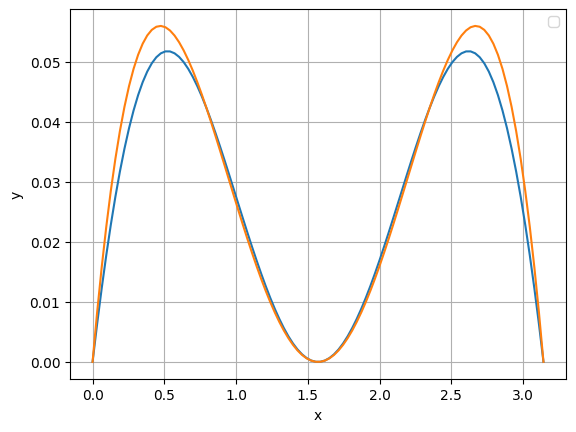

In [3]:
x_1 = np.linspace(0,3.1416,100)


plt.plot(x_1,y_1,)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.plot(x_1,abs(np.sin(x_1)-pol(x_1)))
plt.grid()
plt.legend() #aparecera una leyenda con las variables a las que les pongas 'nombre'

# 1b
Repita el numeral anterior, pero para los polinomios de interpolación de Hermite, conociendo que:


$$
f(x) - P(x) = \epsilon = \frac{f^{(2n+2)}(\xi)}{(2n+2)!} \prod_{i=0}^{n} (x - x_i)^2
$$

In [4]:
x = np.array([0,np.pi/2,np.pi])
x_1 = sp.symbols('x')
y = sp.sin(x_1)
y_prime = sp.diff(y,x_1)
y_prime = sp.lambdify(x_1,y_prime)
y = sp.lambdify(x_1, y)


# Ahora vamos a encontrar el error asociado a este polinomio
x_1 = sp.symbols('x')
f_x = sp.sin(x_1)

pol_h = CubicHermiteSpline(x,y(x), y_prime(x))
print(pol_h(1.5))


def error_hermite(x, f_x, xsim = sp.symbols('x')):
  x_inter = np.linspace(x[0],x[-1],100)
  f_prima = sp.diff(f_x, xsim, 2*len(x)+2)
  f_prima = sp.lambdify(x_1, f_prima)
  error = []
  fact = mt.factorial(2*(len(x)+2))
  for i in range(len(x_inter)):
    prod = 1
    for j in range(len(x)):
      prod = prod*((x_inter[i]-x[j])**2)
    erre = abs((1/fact)*f_prima(x_inter[i])*prod)
    error.append(erre)
  print(error)
  return x_inter, error

x_2, y_2 = error_hermite(x,f_x)



0.9971361024677913
[0.0, 2.01698398952388e-10, 1.5155448500817602e-09, 4.797286434036761e-09, 1.0649343595637365e-08, 1.944919799827619e-08, 3.137694751276625e-08, 4.644189061962613e-08, 6.450801668696814e-08, 8.531829277060128e-08, 1.0851765170352436e-07, 1.3367460023544082e-07, 1.6030137978819404e-07, 1.878726259513163e-07, 2.1584248609692105e-07, 2.4366016739128737e-07, 2.7078389997084794e-07, 2.9669331208496083e-07, 3.2090022554197175e-07, 3.4295789078696234e-07, 3.624686913508312e-07, 3.7909035720592346e-07, 3.925407357117187e-07, 4.026011773070321e-07, 4.0911860087826427e-07, 4.120063107855433e-07, 4.1124364384286147e-07, 4.068745301109119e-07, 3.990050561622752e-07, 3.8780012351159344e-07, 3.7347929816565405e-07, 3.5631194974078735e-07, 3.36611780322037e-07, 3.1473084420809726e-07, 2.910531599092989e-07, 2.659880152575891e-07, 2.399630652653392e-07, 2.1341732045488227e-07, 1.8679412079696436e-07, 1.6053418717061127e-07, 1.350688384189735e-07, 1.1081345765771671e-07, 8.8161286529

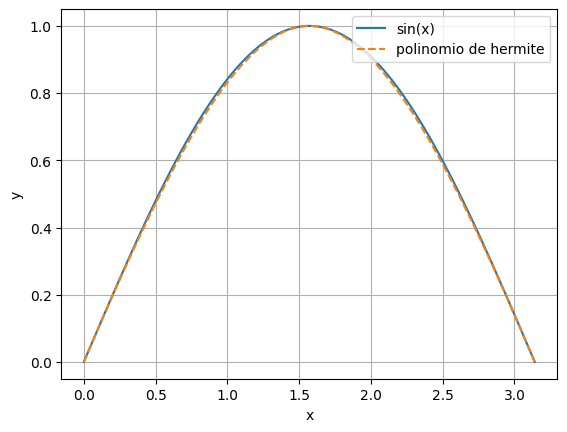

In [5]:
plt.plot(x_2,np.sin((x_2)),label = 'sin(x)')
plt.plot(x_2,pol_h(x_2), '--', label = 'polinomio de hermite')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend(loc = 'upper right')
plt.show()

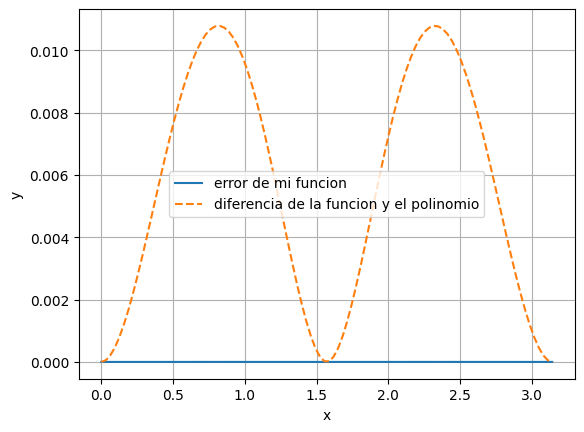

In [6]:
x_1 = np.linspace(0,3.1416,100)


plt.plot(x_2,y_2,label = 'error de mi funcion')
plt.plot(x_2,abs(np.sin(x_2)-pol_h(x_2)),'--', label = 'diferencia de la funcion y el polinomio')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()


# 2

En física nuclear se calcula la sección eficaz de dispersión (scattering cross section) a partir de experimentos de colisiones, se sabe a partir de la teoría que la sección eficaz se describe por la formula de Breit-Wigner,

$$\sigma(E)=\frac{\sigma_0}{(E-E_r)^2+\frac{\Gamma^2}{4}}$$

donde $E$ es la energía y $E_r,\sigma_0, \Gamma$ son parámetros a ajustar; el valor predicho es $(E_r,\Gamma) = (78, 55)$ MeV; donde $\sigma_0$ se puede calcular ahora a partir de la fórmula simplemente remplazando cualquier par de puntos de la tabla.

A partir de los valores de energía,


```
Energia  = np.array([0   , 25  , 50  , 75  , 100 , 125 , 150 , 175 , 200])
sigma_exp= np.array([10.6, 16.0, 45.0, 83.5, 52.8, 19.9, 10.8, 8.25, 4.7])

```

### **Calcule los polinomios de Lagrange, Newton y Hermite.**

In [7]:
E_r, e = 78,55
energia  = np.array([0 , 25  , 50  , 75  , 100 , 125 , 150 , 175 , 200])
e_0 = energia[1]

sigma_exp = np.array([10.6, 16.0, 45.0, 83.5, 52.8, 19.9, 10.8, 8.25, 4.7])
s_0 = sigma_exp[1]

#calculemos la derivada y evaluemosla en los puntos dados
x_1 = sp.symbols('x')
sigma_0 = s_0*(((e_0 - E_r)**2)+(e**2/4))
sigma_f = sigma_0/(((x_1 - E_r)**2)+(e**2/4))

sf_prima = sp.diff(sigma_f,x_1)
sigma_f = sp.lambdify(x_1,sigma_f)
sf_prima = sp.lambdify(x_1, sf_prima)

derivate = sf_prima(energia)


secc_lag = lagrange(energia, sigma_exp)
secc_new = BarycentricInterpolator(energia, sigma_exp)
secc_her = CubicHermiteSpline(energia, sigma_exp,derivate)



### **Hacer un gráfico de los polinomios junto con la función.**

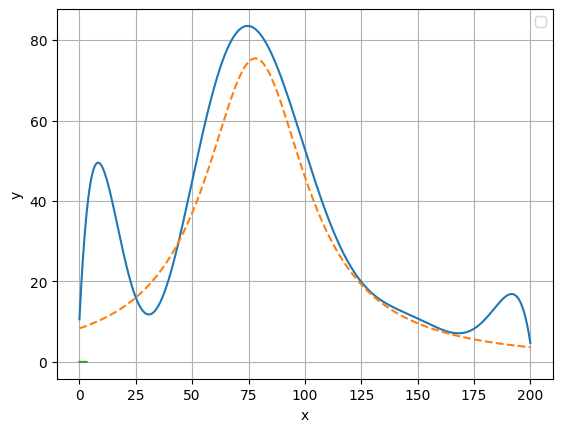

In [8]:
x_lin = np.linspace(0,200,500)

plt.plot(x_lin,secc_lag(x_lin))
plt.plot(x_lin, sigma_f(x_lin),"--")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.plot(x_2,abs(np.sin(x_2)-pol_h(x_2)))
plt.grid()
plt.legend()

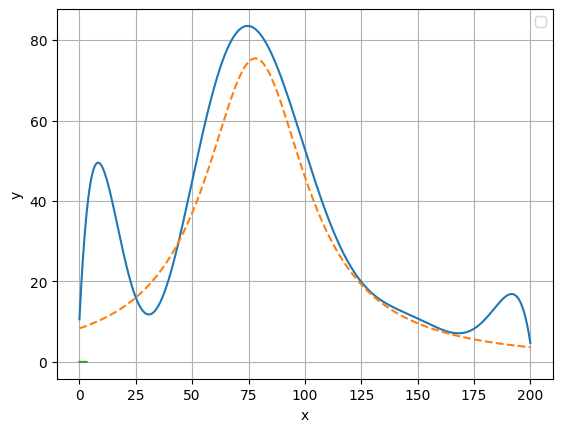

In [9]:

plt.plot(x_lin,secc_new(x_lin))
plt.plot(x_lin, sigma_f(x_lin),"--")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.plot(x_2,abs(np.sin(x_2)-pol_h(x_2)))
plt.grid()
plt.legend()

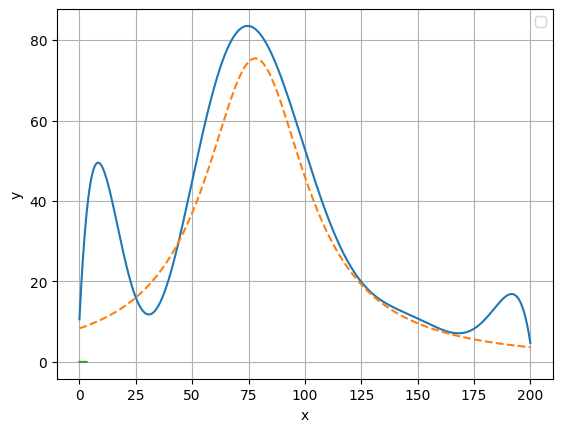

In [10]:
plt.plot(x_lin,secc_new(x_lin))
plt.plot(x_lin, sigma_f(x_lin),"--")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.plot(x_2,abs(np.sin(x_2)-pol_h(x_2)))
plt.grid()
plt.legend()


### **A partir de la diferencia $|f(x) - P_n(x)|$ calcule el error asociado a cada uno de ellos. ¿Cuál será el mejor?**

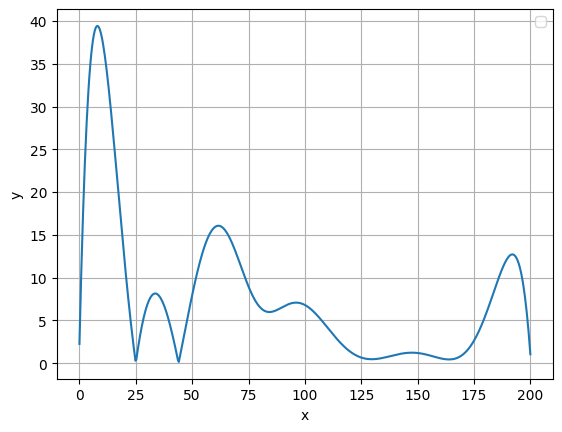

In [11]:
plt.plot(x_lin,abs(sigma_f(x_lin)-secc_lag(x_lin)))
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.legend()

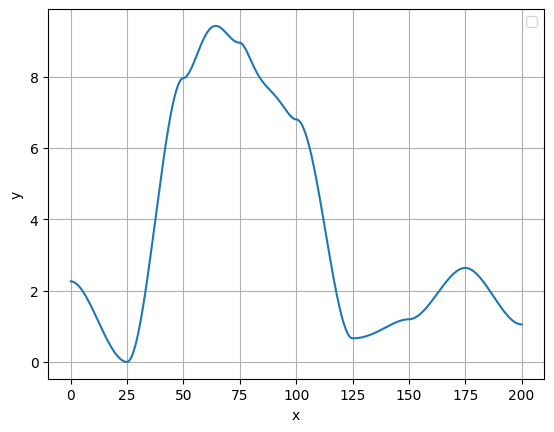

In [12]:
#error asociado al polinomio de hermite
plt.plot(x_lin,abs(sigma_f(x_lin)-secc_her(x_lin)))
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.legend()

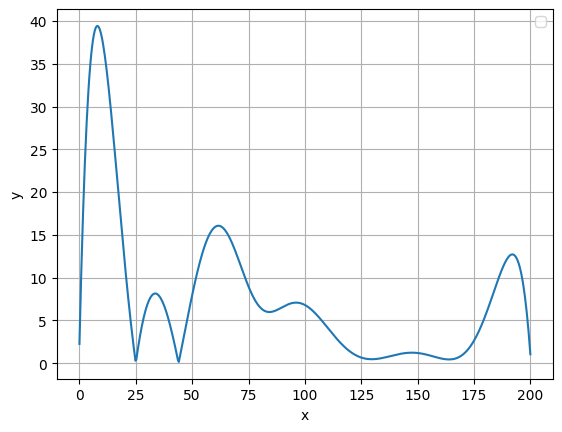

In [13]:
# Error asociado al polinmio de newton
plt.plot(x_lin,abs(sigma_f(x_lin)-secc_new(x_lin)))
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.legend()

#3



## **Consideremos la función:**
\begin{equation*}
     f(x) = \frac{1}{1+25x^2}
\end{equation*}
en el intervalo $[-1, 1]$, definamos un conjunto de puntos $n+1$  equiespaciados en $[-1,1]$.

* Representar gráficamente la función junto al polinomio de interpolación de Lagrange, $p_n(x)$, para $n=\{ 4, 8, 12, 16, 20 \}$.

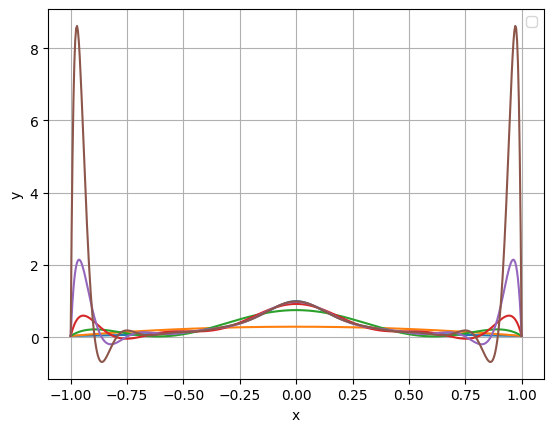

In [56]:
def fn_lin(n):
  x_d = np.linspace(-1,1,n)
  return x_d


f_xd = lambda x_d: (1 + 25*((x_d)**2))**(-1)

f_x4 = lagrange(fn_lin(4), f_xd(fn_lin(4)))
f_x8 = lagrange(fn_lin(8), f_xd(fn_lin(8)))
f_x12 = lagrange(fn_lin(12), f_xd(fn_lin(12)))
f_x16 = lagrange(fn_lin(16), f_xd(fn_lin(16)))
f_x20 = lagrange(fn_lin(20), f_xd(fn_lin(20)))

x_lin = np.linspace(-1,1,500)
plt.plot(x_lin, f_xd(x_lin))
plt.plot(x_lin,f_x4(x_lin))
plt.plot(x_lin,f_x8(x_lin))
plt.plot(x_lin,f_x12(x_lin))
plt.plot(x_lin,f_x16(x_lin))
plt.plot(x_lin,f_x20(x_lin))
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.legend()

### **n = 4**

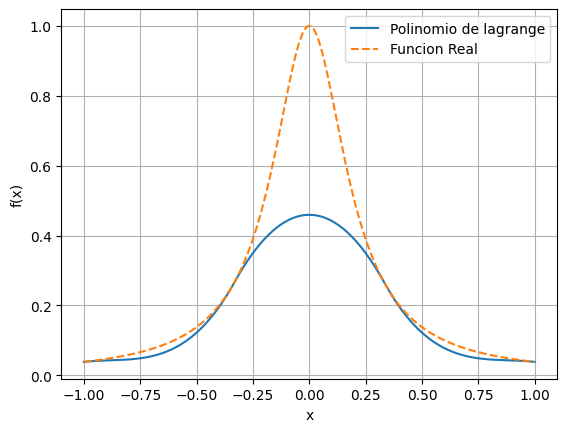

In [62]:
# n = 4
plt.plot(x_lin,f_x4(x_lin), label = 'Polinomio de lagrange')
plt.plot(x_lin, f_xd(x_lin),'--',label = 'Funcion Real')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid()
plt.legend()

### **n = 8**

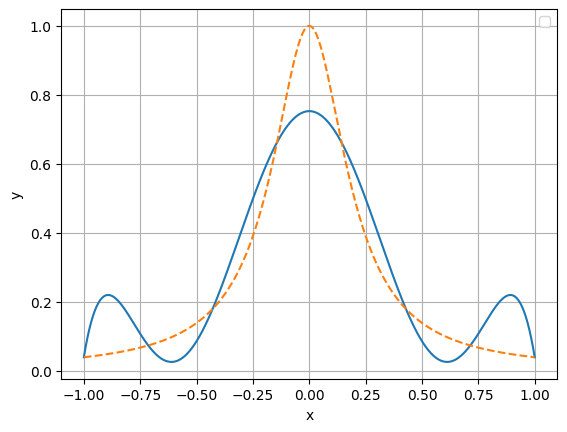

In [16]:
# n = 8
plt.plot(x_lin,f_x8(x_lin))
plt.plot(x_lin, f_xd(x_lin),'--')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.legend()

### **n = 12**

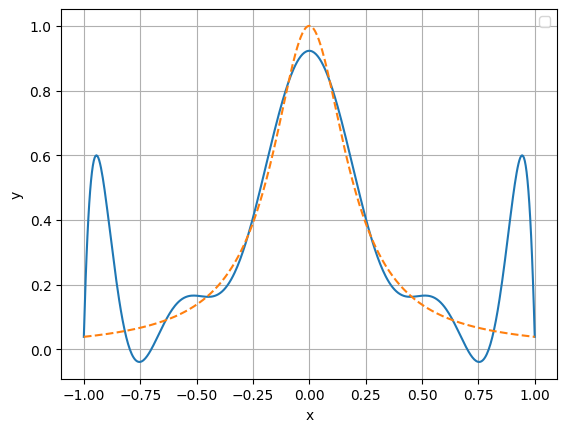

In [17]:
# n = 12
plt.plot(x_lin,f_x12(x_lin))
plt.plot(x_lin, f_xd(x_lin),'--')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.legend()

### **n = 16**

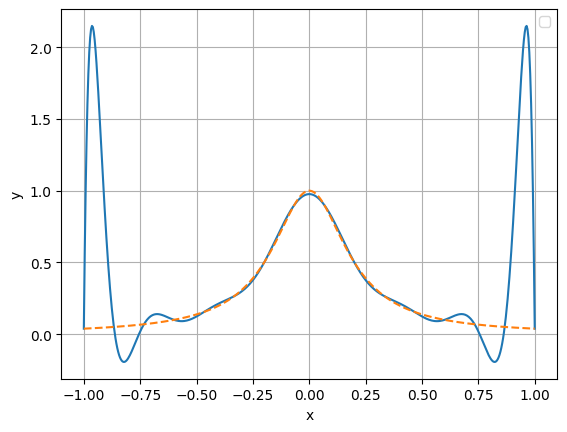

In [18]:
# n = 16
plt.plot(x_lin,f_x16(x_lin))
plt.plot(x_lin, f_xd(x_lin),'--')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.legend()

### **n = 20**

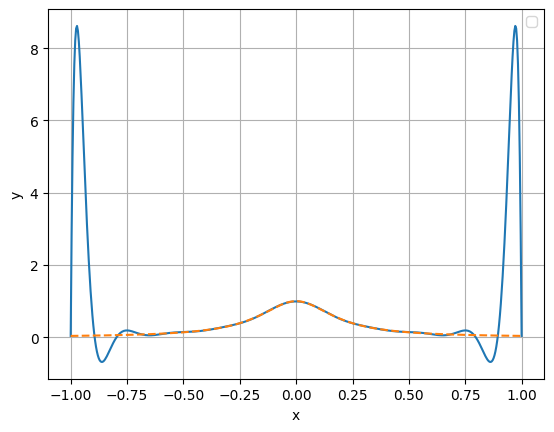

In [19]:
# n = 20
plt.plot(x_lin,f_x20(x_lin))
plt.plot(x_lin, f_xd(x_lin),'--')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.legend()

## **Punto siguiente**
* Comprobar gráficamente cómo el error aumenta con $n$. Emplee la libreria, simbolica de `sympy` y encuente el error en la interpolación. La cota del  error , viene dado por:
\begin{equation}
f(x) - P(x) = \epsilon = \frac{1}{(n+1)!} f^{(n+1)}(x)(x - x_0)(x - x_1) ... (x - x_n)
\end{equation}

emplee la libreria simbólica para realizar la estimación de dicha cuota, sólo para $n = 4$, en el punto $x=0.5$.

In [20]:
# realizemos una grafica interpuesta con los n propuestos
x_1 = sp.symbols('x')
f_sim = (1 + 25*(x_1**2))**(-1)
x_4, err_4 = error_lagrange(fn_lin(4),f_sim)
x_8, err_8 = error_lagrange(fn_lin(8),f_sim)
x_12, err_12 = error_lagrange(fn_lin(12),f_sim)
x_16, err_16 = error_lagrange(fn_lin(16),f_sim)
x_20, err_20 = error_lagrange(fn_lin(20),f_sim)

[0.0, 0.0011477359433030281, 0.0024256271879022247, 0.003846529931933725, 0.005424347993176056, 0.007174037824828532, 0.009111579242403462, 0.011253897191630162, 0.013618714935442094, 0.01622431255788336, 0.019089156243433474, 0.022231352864219747, 0.025667870367213547, 0.029413446585738072, 0.033479086656975694, 0.03787002154788873, 0.04258296694697078, 0.0476024834454465, 0.05289619766184089, 0.05840860514160683, 0.06405315082365678, 0.06970229357975827, 0.0751753483583669, 0.08022413523620982, 0.08451697537007967, 0.0876225745741312, 0.08899718526731905, 0.08798172302904905, 0.08382116408705975, 0.07572797868575583, 0.06302658139482435, 0.04543937142643452, 0.023609374388472333, 1.2614420286525544e-16, 0.019638796759417182, 0.02402566228725803, 0.006807944362435435, 0.1053608739373447, 0.3200072278513829, 0.7145824459172266, 1.357305948727154, 2.2874933761426255, 3.4469242188609313, 4.575438083672113, 5.115334899125755, 4.250515690382778, 1.2580239485367315, 3.802143353172249, 9.497

### **n = 4**

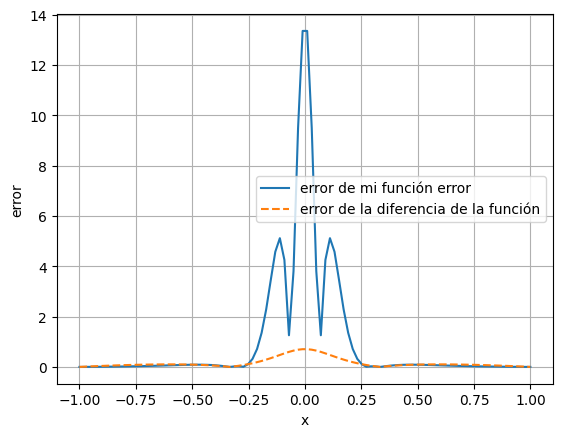

In [21]:
plt.plot(x_4, err_4, label = "error de mi función error")
plt.plot(x_4,abs(f_xd(x_4) - f_x4(x_4)),'--',label = "error de la diferencia de la función")
plt.xlabel('x')
plt.ylabel('error')
plt.legend()
plt.grid()
plt.legend()

### **n = 8**

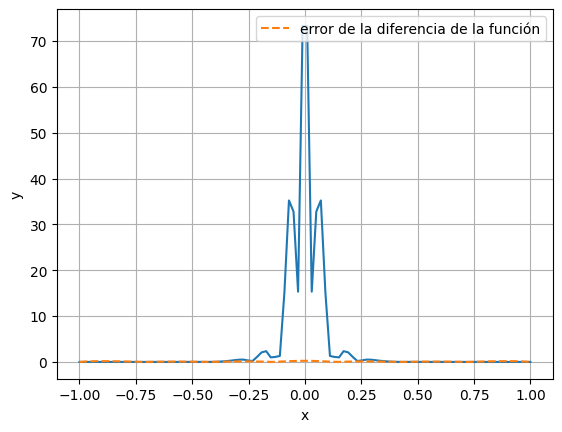

In [22]:
plt.plot(x_8, err_8)
plt.plot(x_8,abs(f_xd(x_8) - f_x8(x_8)),'--',label = "error de la diferencia de la función")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.legend()

### **n = 12**

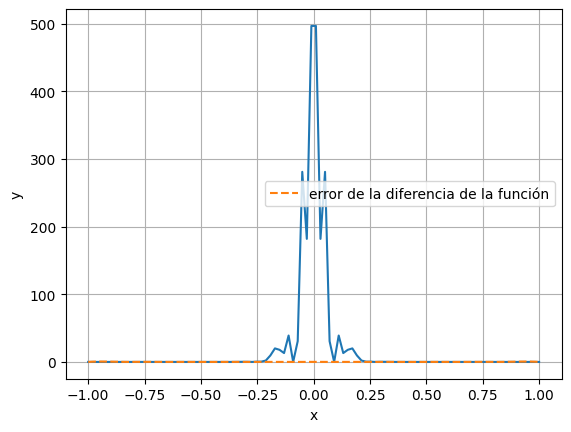

In [23]:
plt.plot(x_12, err_12)
plt.plot(x_12,abs(f_xd(x_12) - f_x12(x_12)),'--',label = "error de la diferencia de la función")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.legend()

### **n = 16**

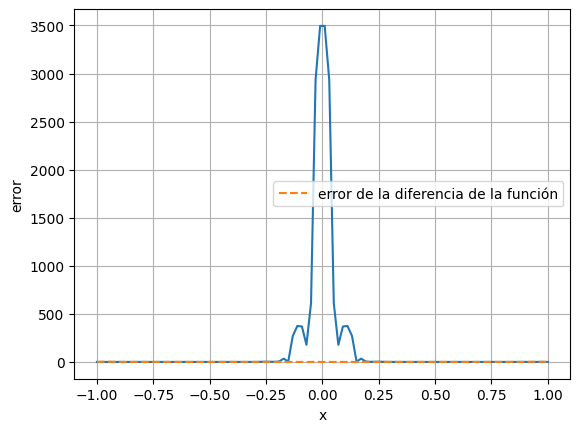

In [24]:
plt.plot(x_16, err_16)
plt.plot(x_16,abs(f_xd(x_16) - f_x16(x_16)),'--',label = "error de la diferencia de la función")
plt.xlabel('x')
plt.ylabel('error')
plt.legend()
plt.grid()
plt.legend()

### **n = 20**

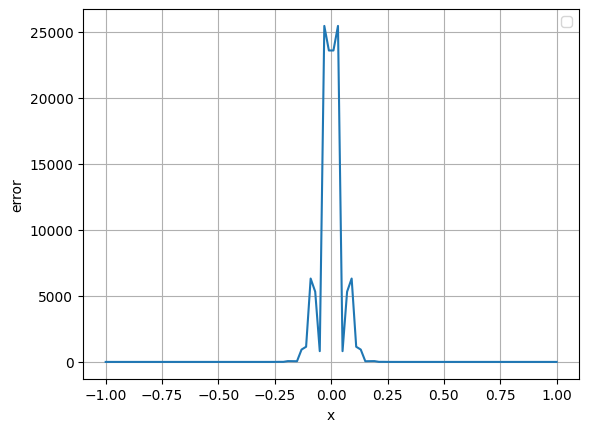

In [25]:
plt.plot(x_20, err_20)

plt.xlabel('x')
plt.ylabel('error')
plt.legend()
plt.grid()
plt.legend()

### **Ahora veamos el error de cada uno en** x = 0.5

el error de p(x) cuando n = 4 y x = 0.5 es de 0.08762257457413136


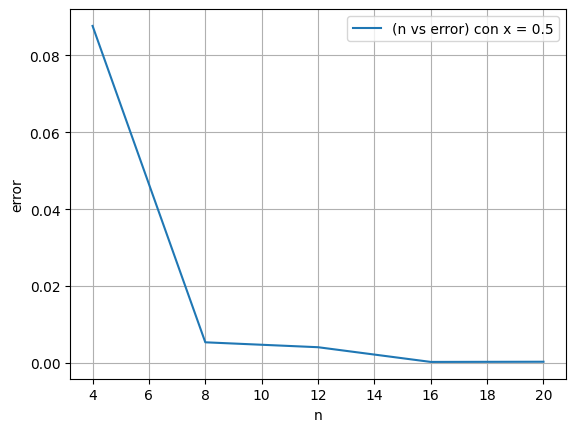

In [54]:
# Para esto debemos de encontrar el numero en la lista x_(n)[j] = 0.5 para cada n
def xinador(x):
  epsilon = 1e-2
  for i in range(len(x)):
    if abs(x[i] - 0.5) < epsilon:
      return i

#ahora veamos el error para cada uno de los n

e_4 = err_4[xinador(x_4)]
e_8 = err_8[xinador(x_8)]
e_12 = err_12[xinador(x_12)]
e_16 = err_16[xinador(x_16)]
e_20 = err_20[xinador(x_20)]

e = [e_4,e_8,e_12,e_16,e_20]
x = [4, 8, 12, 16, 20]
print(f"el error de p(x) cuando n = 4 y x = 0.5 es de {e_4}")

# grafica de los errores conforme n aumenta
e = [e_4,e_8,e_12,e_16,e_20]
x = [4, 8, 12, 16, 20]
plt.plot(x, e, label = '(n vs error) con x = 0.5')
plt.xlabel('n')
plt.ylabel('error')
plt.legend()
plt.grid()
plt.show()

## **Ultimo punto**
* Repita la parte inicial para el conjunto de $p_n(x)$ con $n=\{ 4, 8, 12, 16, 20 \}$, usando la interpolación de Hermite, ¿existe alguna diferencia?

**respuesta tras realizar el punto:** se nota una evidente diferencia con respecto a la aproximacion con el polinomio de lagrange, no entiendo muy bien por que, pero el polinomio de Hermite se aproxima sorprendentemente bien a la funcion deseada.

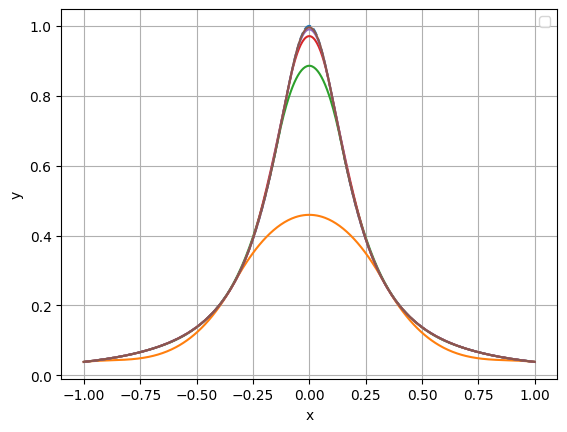

In [63]:
f_xsim = (1 + 25*((x_1)**2))**(-1)
f_prime = sp.diff(f_xsim,x_1)
f_prime = sp.lambdify(x_1, f_prime)

f_x4 = CubicHermiteSpline(fn_lin(4), f_xd(fn_lin(4)), f_prime(fn_lin(4)))
f_x8 = CubicHermiteSpline(fn_lin(8), f_xd(fn_lin(8)), f_prime(fn_lin(8)))
f_x12 = CubicHermiteSpline(fn_lin(12), f_xd(fn_lin(12)), f_prime(fn_lin(12)))
f_x16 = CubicHermiteSpline(fn_lin(16), f_xd(fn_lin(16)), f_prime(fn_lin(16)))
f_x20 = CubicHermiteSpline(fn_lin(20), f_xd(fn_lin(20)), f_prime(fn_lin(20)))

x_lin = np.linspace(-1,1,500)
plt.plot(x_lin, f_xd(x_lin),'--')
plt.plot(x_lin,f_x4(x_lin))
plt.plot(x_lin,f_x8(x_lin))
plt.plot(x_lin,f_x12(x_lin))
plt.plot(x_lin,f_x16(x_lin))
plt.plot(x_lin,f_x20(x_lin))
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.legend()

### **n = 4**

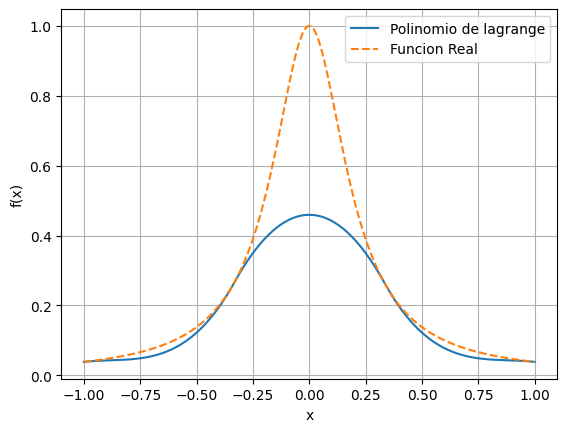

In [64]:
# n = 4
plt.plot(x_lin,f_x4(x_lin), label = 'Polinomio de Hermite')
plt.plot(x_lin, f_xd(x_lin),'--',label = 'Funcion Real')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid()
plt.legend()

### **n = 8**

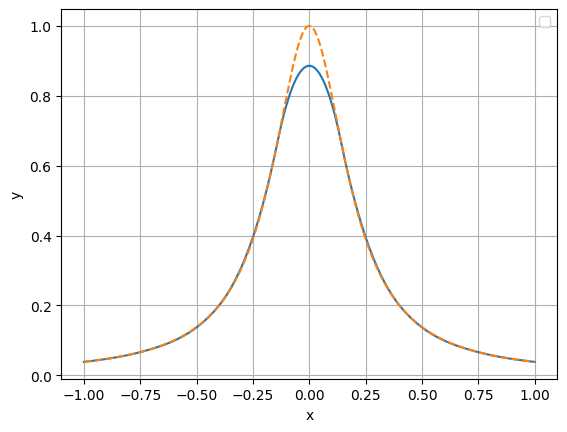

In [65]:
# n = 8
plt.plot(x_lin,f_x8(x_lin), label = 'polinomio de Hermite')
plt.plot(x_lin, f_xd(x_lin),'--', label = 'Funcion Real')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.legend()

### **n = 12**

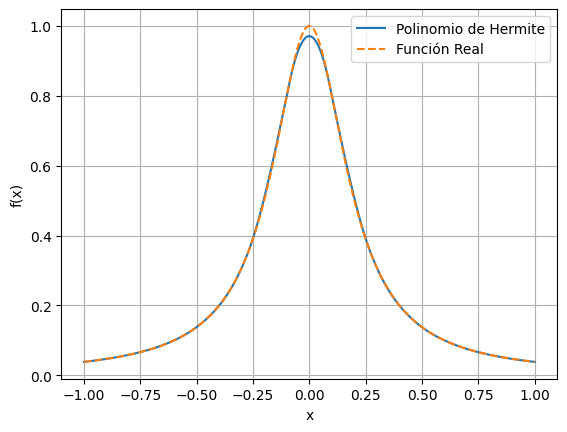

In [69]:
# n = 12
plt.plot(x_lin,f_x12(x_lin), label = 'Polinomio de Hermite')
plt.plot(x_lin, f_xd(x_lin),'--', label = 'Función Real')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid()
plt.legend()

### **n = 16**

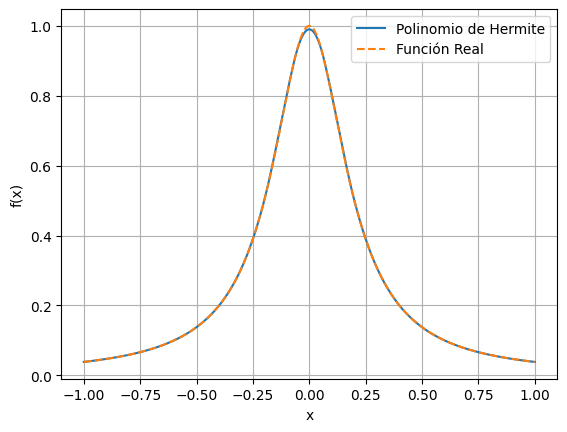

In [70]:
# n = 16
plt.plot(x_lin,f_x16(x_lin), label = 'Polinomio de Hermite')
plt.plot(x_lin, f_xd(x_lin),'--', label = 'Función Real')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid()
plt.legend()

### **n = 20**

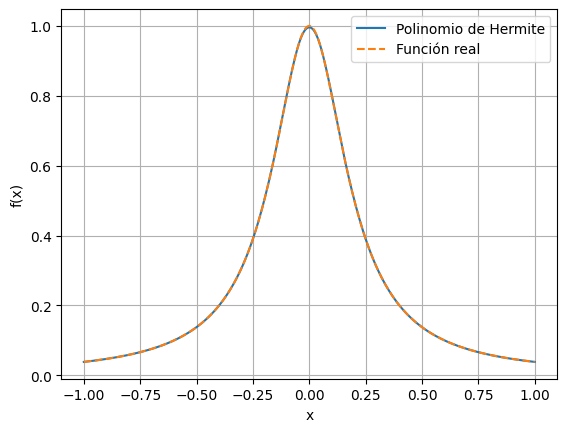

In [72]:
# n = 20
plt.plot(x_lin,f_x20(x_lin), label = 'Polinomio de Hermite')
plt.plot(x_lin, f_xd(x_lin),'--', label = 'Función real')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid()
plt.legend()

## **Ultimo punto del ultimo punto**

Ahora calculemos el error de el polinomio de hermite y a la vez este mismo interpolando x = 0.5

In [73]:
# realizemos una grafica interpuesta con los n propuestos
x_1 = sp.symbols('x')
f_sim = (1 + 25*(x_1**2))**(-1)
x_4, err_4 = error_hermite(fn_lin(4),f_sim)
x_8, err_8 = error_hermite(fn_lin(8),f_sim)
x_12, err_12 = error_hermite(fn_lin(12),f_sim)
x_16, err_16 = error_hermite(fn_lin(16),f_sim)
x_20, err_20 = error_hermite(fn_lin(20),f_sim)

[0.0, 1.3965822787316202e-06, 5.98603383690102e-06, 1.4379727776486813e-05, 2.716952577302821e-05, 4.4862521120163215e-05, 6.778165047734775e-05, 9.591914938107973e-05, 0.00012872594464136838, 0.00016481555826151998, 0.0002015562254104382, 0.00023452039403233936, 0.00025675798564151283, 0.0002578613794946178, 0.00022280063224092844, 0.00013053464049233185, 4.7539934172366734e-05, 0.00034913643600840993, 0.0008222790113272358, 0.0015255251526880011, 0.002526142884669016, 0.003894565449034392, 0.005692691051425443, 0.00795287150237744, 0.01064424917579151, 0.013624615040438584, 0.016581445062973835, 0.01897903284544766, 0.02005452250625563, 0.018946012730028168, 0.015075219633351915, 0.00887321221426202, 0.0026139390837169848, 7.111793303074946e-32, 0.00034767654406861053, 0.02188216598133156, 0.1657205109602174, 0.6791547037121929, 1.9691511749189377, 4.1813007120446395, 5.538125667797446, 1.1116822214628581, 29.944972190517973, 87.17402161556588, 122.1032561077383, 5.338073916686929, 3

### **n = 4**

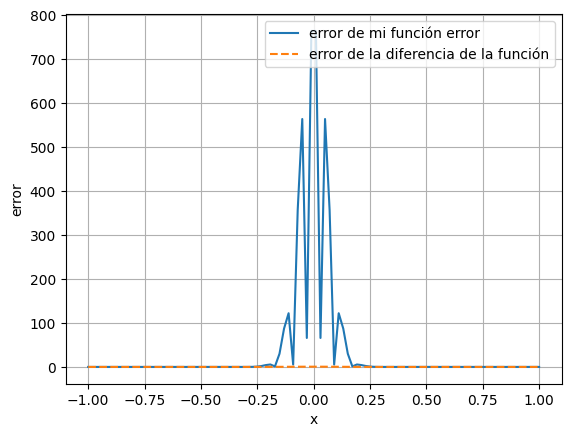

In [74]:
plt.plot(x_4, err_4, label = "error de mi función error")
plt.plot(x_4,abs(f_xd(x_4) - f_x4(x_4)),'--',label = "error de la diferencia de la función")
plt.xlabel('x')
plt.ylabel('error')
plt.legend()
plt.grid()
plt.legend()

### **n = 8**

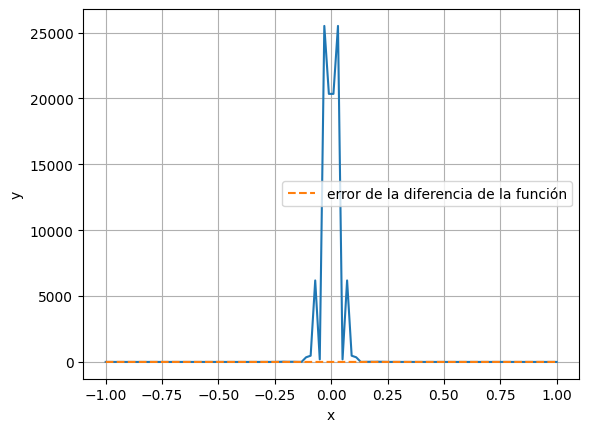

In [75]:
plt.plot(x_8, err_8)
plt.plot(x_8,abs(f_xd(x_8) - f_x8(x_8)),'--',label = "error de la diferencia de la función")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.legend()

### **n = 12**

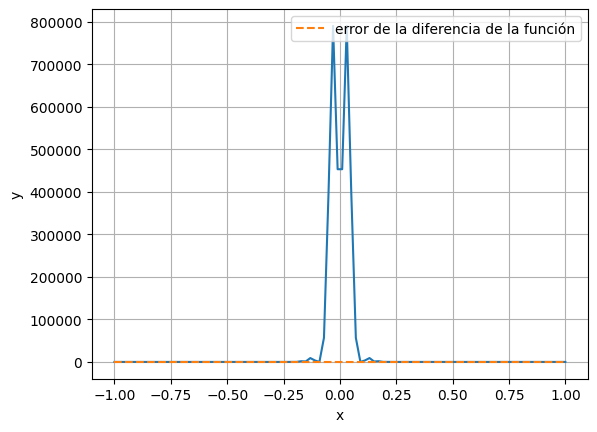

In [80]:
plt.plot(x_12, err_12)
plt.plot(x_12,abs(f_xd(x_12) - f_x12(x_12)),'--',label = "error de la diferencia de la función")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.legend()

### **n = 16**

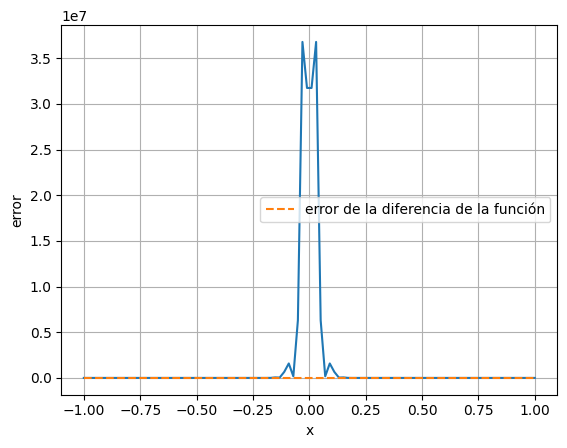

In [85]:
plt.plot(x_16, err_16)
plt.plot(x_16,abs(f_xd(x_16) - f_x16(x_16)),'--',label = "error de la diferencia de la función")
plt.xlabel('x')
plt.ylabel('error')
plt.legend()
plt.grid()
plt.legend()

### **n = 20**

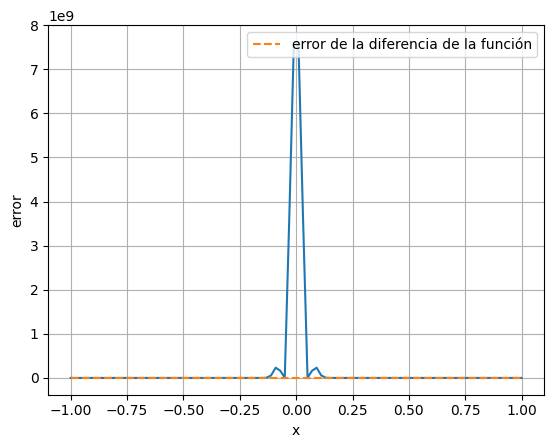

In [84]:
plt.plot(x_20, err_20)
plt.plot(x_20,abs(f_xd(x_16) - f_x20(x_20)),'--',label = "error de la diferencia de la función")
plt.xlabel('x')
plt.ylabel('error')
plt.legend()
plt.grid()
plt.legend()

### **Ahora veamos el error de cada uno en** x = 0.5

el error de p(x) cuando n = 4 y x = 0.5 es de 0.01362461504043889


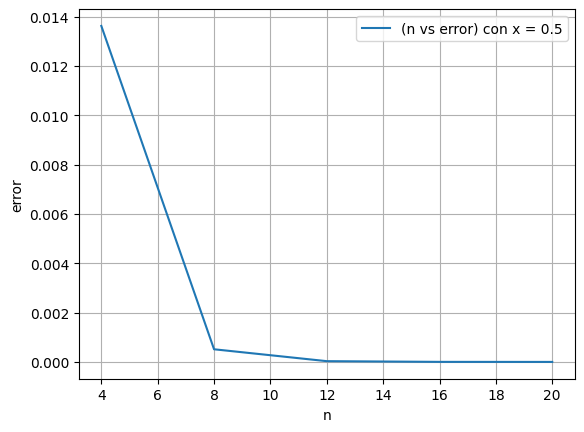

In [79]:
# Para esto debemos de encontrar el numero en la lista x_(n)[j] = 0.5 para cada n
def xinador(x):
  epsilon = 1e-2
  for i in range(len(x)):
    if abs(x[i] - 0.5) < epsilon:
      return i

#ahora veamos el error para cada uno de los n

e_4 = err_4[xinador(x_4)]
e_8 = err_8[xinador(x_8)]
e_12 = err_12[xinador(x_12)]
e_16 = err_16[xinador(x_16)]
e_20 = err_20[xinador(x_20)]

e = [e_4,e_8,e_12,e_16,e_20]
x = [4, 8, 12, 16, 20]
print(f"el error de H(x) cuando n = 4 y x = 0.5 es de {e_4}")

# grafica de los errores conforme n aumenta
e = [e_4,e_8,e_12,e_16,e_20]
x = [4, 8, 12, 16, 20]
plt.plot(x, e, label = '(n vs error) con x = 0.5')
plt.xlabel('n')
plt.ylabel('error')
plt.legend()
plt.grid()
plt.show()

# 4

Consideremos la imagen ![paloma](https://github.com/hernansalinas/autogrades/blob/main/Laboratorios_Taller/img/paloma.png?raw=true).

Ref: Metodos numericos, Burden.


Con los datos dados en la tabla:

1. Representar gráficamente la imagen, usando las órdenes `imread` e `imshow` de python (estas órdenes están contenidas en el paquete `matplotlib`)

2. Definir una lista de puntos, $x_i$,$y_i$ del pato.

3. Representar el polinomio de interpolación de Lagrange y de Hermite en estos puntos, para aproximar el dibujo.

4. Repetir el proceso de interpolación mediante *splines* cúbicos. Para ello, utilizar la función `CubicSpline` (contenida en `scipy.interpolate`),


5. Comparar los resultados. ¿Alguna de las interpolaciones presenta oscilaciones? ¿A qué se debe este fenómeno?



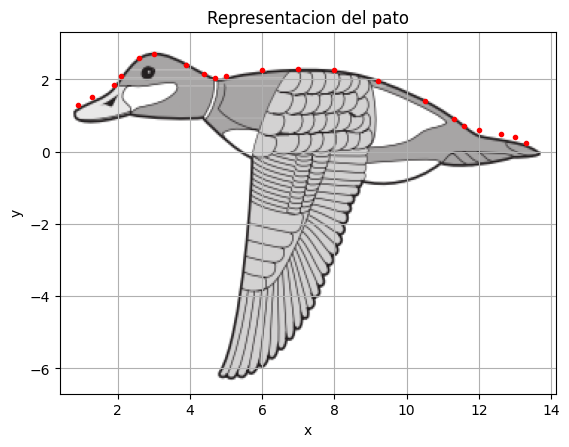

In [26]:
pato = 'https://3.bp.blogspot.com/-8_LTrCIxVSQ/VxU-5Gq2ffI/AAAAAAAAIto/LhCDEwHKTiAbLr7IhizQwGV13YTwgpbDwCLcB/s400/pato1.png' #URL
urllib.request.urlretrieve(pato, 'pato.jpg')# Decargar la imagen
imagen_pato = plt.imread('pato.jpg') # Variable con la imagen del pato

# Definimos los puntos del pato
xp = [0.9, 1.3, 1.9, 2.1, 2.6, 3.0, 3.9, 4.4, 4.7, 5.0, 6.0, 7.0, 8.0, 9.2, 10.5, 11.3, 11.6, 12.0, 12.6, 13.0, 13.3]
yp = [1.3, 1.5, 1.85, 2.1, 2.6, 2.7, 2.4, 2.15, 2.05, 2.1, 2.25, 2.3, 2.25, 1.95, 1.4, 0.9, 0.7, 0.6, 0.5, 0.4, 0.25]

# Representamos graficamente al pato y los puntos que definimos para su contorno superior
plt.figure()
plt.title('Representacion del pato')
plt.imshow(imagen_pato, extent = (0.4, 14.13, -6.7, 3.32)) # Ajustamos los pixeles para que coinsidan con x y y
plt.plot(xp, yp, '.r')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

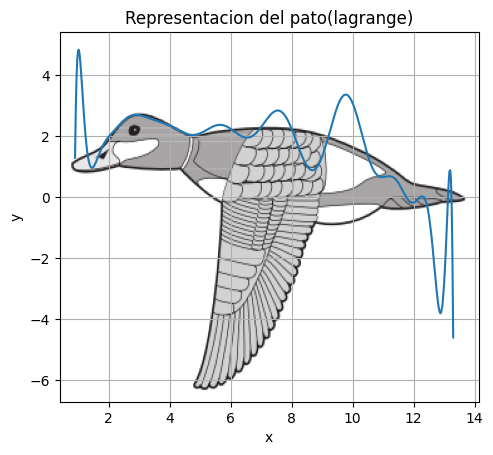

In [27]:
#aproximacion a el pato por polinomio de lagrange
l = lagrange(xp,yp)

x_lin2 = np.linspace(xp[0],xp[-1],500)

plt.figure()
plt.title('Representacion del pato(lagrange)')
plt.imshow(imagen_pato, extent = (0.4, 14.13, -6.7, 3.32)) # Ajustamos los pixeles para que coinsidan con x y y
plt.plot(x_lin2, l(x_lin2))
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

21
[0.4999999999999999, 0.5833333333333336, 1.249999999999999, 1.0, 0.2500000000000003, -0.33333333333333365, -0.49999999999999956, -0.3333333333333338, 0.16666666666666766, 0.1499999999999999, 0.04999999999999982, -0.04999999999999982, -0.25000000000000017, -0.4230769230769229, -0.6249999999999993, -0.6666666666666693, -0.24999999999999972, -0.16666666666666674, -0.24999999999999972, -0.4999999999999989, 0.018796992481203006]


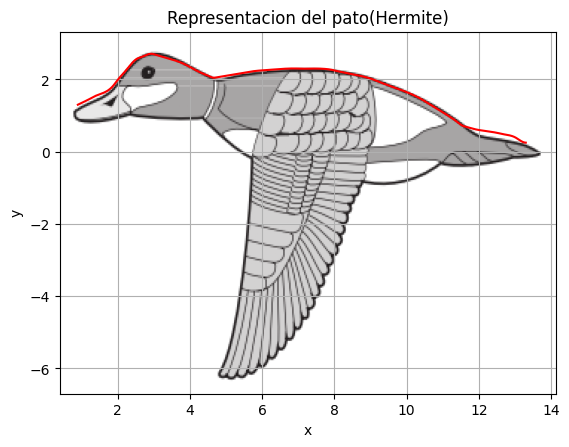

In [28]:
#Aproximacion de el pato con el polinomio de Hermite
dx = []
h = 0.00001
print(len(xp))
for i in range(len(xp)):
  if i == len(xp)-1:
    m = yp[i]/xp[i]
    dx.append(m)
    break
  m = ((yp[i+1]) - yp[i])/(xp[i+1] - xp[i])
  dx.append(m)

print(dx)
h = CubicHermiteSpline(xp,yp,dx)

plt.figure()
plt.title('Representacion del pato(Hermite)')
plt.imshow(imagen_pato, extent = (0.4, 14.13, -6.7, 3.32)) # Ajustamos los pixeles para que coinsidan con x y y
plt.plot(x_lin2, h(x_lin2), color = 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()


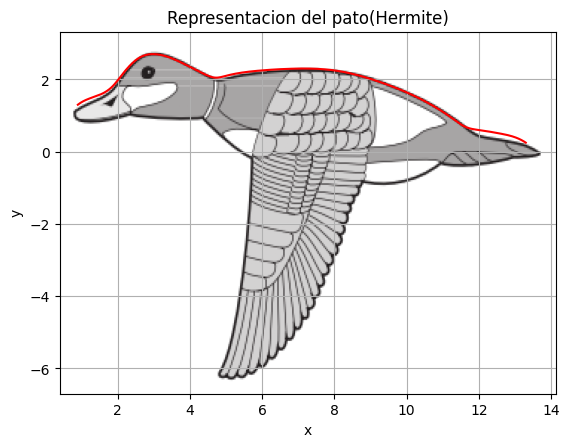

In [29]:
#aproximacion al pato por el metodo de spline cúbico
c = CubicSpline(xp,yp)

plt.figure()
plt.title('Representacion del pato(Hermite)')
plt.imshow(imagen_pato, extent = (0.4, 14.13, -6.7, 3.32)) # Ajustamos los pixeles para que coinsidan con x y y
plt.plot(x_lin2, c(x_lin2), color = 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

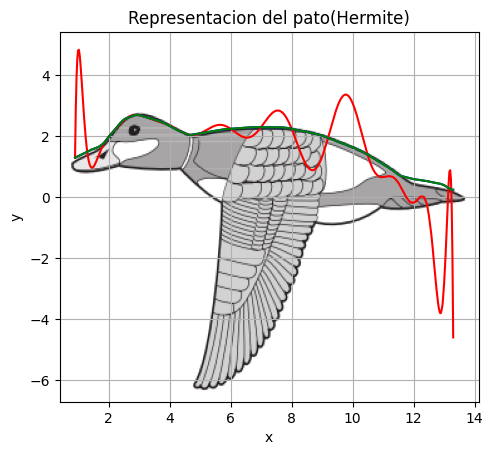

In [30]:
#gráfico de comparación de aproximacion polinomiales

plt.figure()
plt.title('Representacion del pato(Hermite)')
plt.imshow(imagen_pato, extent = (0.4, 14.13, -6.7, 3.32)) # Ajustamos los pixeles para que coinsidan con x y y
plt.plot(x_lin2, l(x_lin2), color = 'r')
plt.plot(x_lin2, h(x_lin2), color = 'b')
plt.plot(x_lin2, h(x_lin2), color = 'g')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

Concluimos que claramente, el polinmio de lagrange(como siempre) es el que genera mas oscilaciones, esto se debe a nose.

aca abajo le dejo el error de el error entre el polinomio de Hermite y los spines cubicos,la cual visualmente es baja pero en realidad no es tanto.

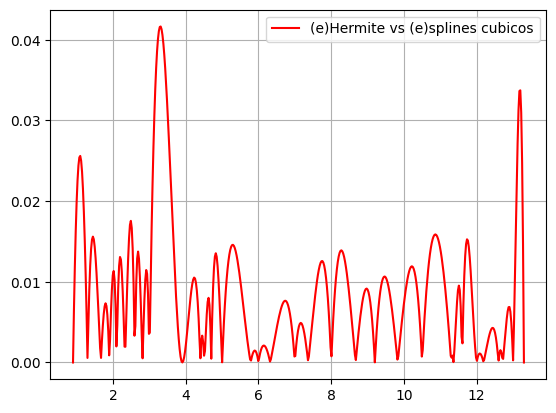

In [31]:
plt.plot(x_lin2, abs(h(x_lin2)-c(x_lin2)), color = 'r', label = '(e)Hermite vs (e)splines cubicos')

plt.grid()
plt.legend()
